# BeautifulSoup
- HTML 문서에서 원하는 부분출 추출해내는 라이브러리
- 'requests'는 HTML을 텍스트 형태로 출력할 뿐이지 실제 HTML 태그를 다루지는 않는다.
- BeautifulSoup 라이브러리는 위의 텍스트 결과를 실제 HTML 코드로 변환해준다.

## BeautifulSoup
- BeautifulSoup()
    - 문자열 HTML 코드를 실제 HTML 코드로 변환해주는 함수

    ```python
    BeautifulSoup(문자열, 'html.parser')
    # 문자열을 HTML 코드로 해석해서 읽어라
    ```

- find_all()
    - HTML 코드에서 우리가 원하는 부분을 모두 가져오는 함수
    - 원하는 부분을 지정할 때 사용하는 것은 태그와  Selector
    - 해당 태그의 모든 HTML 코드를 리스트 형태로 반환

    ```python
    # <div id="example1">
    실제HTML코드.find_all("div") # 태그 이름
    실제HTML코드.find_all(id="example1") # 선택자 정보

    # <div id="example1">, <span class="example2">
    실제HTML코드.find_all(["div", "span"]) # 태그 이름
    실제HTML코드.find_all(attrs = {"id":"example1", "class":"example2"}) # 선택자 정보
    ```



- find()
    - 하나의 부분만 가져오는 함수

    ```python
    # <div id="example1">
    실제HTML코드.find("div") # 태그 이름
    실제HTML코드.find(id="example1") # 선택자 정보
    실제HTML코드.find(attrs = {"id":"example1"}) # 선택자 정보
    실제HTML코드.find("div", {"id":"example1"}) # 태그 이름 + 선택자 정보
    ```

# 함수 find() vs find_all()
- 두 함수의 차이점을 이해하면 효율적으로 크롤링을 할수 있다.
- 로또 당첨 번호를 조회해 보자
- [당첨번호 확인](https://dhlottery.co.kr/gameResult.do?method=byWin)

In [10]:
from bs4 import BeautifulSoup
import requests

In [12]:
lotto_url = "https://dhlottery.co.kr/gameResult.do?method=byWin"
raw = requests.get(lotto_url)
soup = BeautifulSoup(raw.text, "html.parser")

In [14]:
box = soup.find("div", {"class":"num win"})
nums = box.find_all("span")
result = []
for num in nums:
    result.append(num.text)
print(result)

['1', '9', '10', '13', '35', '44']


In [16]:
print(nums)

[<span class="ball_645 lrg ball1">1</span>, <span class="ball_645 lrg ball1">9</span>, <span class="ball_645 lrg ball1">10</span>, <span class="ball_645 lrg ball2">13</span>, <span class="ball_645 lrg ball4">35</span>, <span class="ball_645 lrg ball5">44</span>]


In [13]:
def lotto_win()->list:
    lotto_url = "https://dhlottery.co.kr/gameResult.do?method=byWin"
    raw = requests.get(lotto_url)
    soup = BeautifulSoup(raw.text, "html.parser")
    box = soup.find("div", {"class":"num win"})
    nums = box.find_all("span")
    result = []
    for num in nums:
        result.append(num.text)
    return result

In [14]:
lotto_win()

['6', '24', '31', '32', '38', '44']

In [ ]:
# 네이버 국내 인기 증시
# https://finance.naver.com/sise/

In [17]:
finance_url = "https://finance.naver.com/sise/"
finance_raw = requests.get(finance_url)
# print(finance_raw)
finance_soup = BeautifulSoup(finance_raw.text, "html.parser")


<script language="javascript">

function main_tab(tab_title, pst, tab_cnt)
{
	for(var i=0 ; i<tab_cnt ; i++)
	{
		if (i == pst)
			document.getElementById(tab_title+'_title_tab_'+i).style.display = '';
		else
			document.getElementById(tab_title+'_title_tab_'+i).style.display = 'none';


		if (i == pst)
			document.getElementById(tab_title+'_tab_'+i).style.display = '';
		else
			document.getElementById(tab_title+'_tab_'+i).style.display = 'none';

	}
}

function moveIndex(choiceTab) {
	jindo.$Element(jindo.$$.getSingle("div.lft > ul")).removeClass("tab tab_sel1");
	jindo.$Element(jindo.$$.getSingle("div.lft > ul")).removeClass("tab tab_sel2");
	jindo.$Element(jindo.$$.getSingle("div.lft > ul")).removeClass("tab tab_sel3");
	jindo.$Element(jindo.$$.getSingle("div.lft > ul")).addClass("tab " + choiceTab);

	jindo.$ElementList(jindo.$$(".lft#context")).css("display", "none");
	jindo.$Element(jindo.$$.getSingle("#" + choiceTab + "_panel")).show();

	jindo.$ElementList(jindo.$$("ul.t")).cs

In [26]:
s_1 = finance_soup.find("ul", {"id":"popularItemList"}).find_all("li")
for j,i in enumerate(s_1):
    print(f'{j+1} {i.find("a").text}')

1 두산에너빌리티
2 삼성전자
3 HLB
4 SK하이닉스
5 한미반도체
6 노브랜드
7 포스코퓨처엠
8 에코프로비엠
9 HD현대마린솔루션
10 에코프로


In [27]:
def finance_pop():  
    finance_url = "https://finance.naver.com/sise/"
    finance_raw = requests.get(finance_url)
    # print(finance_raw)
    finance_soup = BeautifulSoup(finance_raw.text, "html.parser")
    s_1 = finance_soup.find("ul", {"id":"popularItemList"}).find_all("li")
    for j,i in enumerate(s_1):
        print(f'{j+1} {i.find("a").text}')

In [28]:
finance_pop()

1 두산에너빌리티
2 삼성전자
3 HLB
4 SK하이닉스
5 한미반도체
6 노브랜드
7 포스코퓨처엠
8 에코프로비엠
9 HD현대마린솔루션
10 에코프로


# URL 패턴
- https://search.hankyung.com/search/news?query=%EC%BD%94%EB%A1%9C%EB%82%98&page=1
- url 패턴 : query="검색값"&page="페이지값"

- 한경 사이트에서 검색어를 입력하면 기사 제목을 3페이지 까지 크롤링하도록 작성해 보세요
```
다음날 느껴지는 입체 탄력피부 비결은 아모레퍼시픽 TR...
비피도 주가 아모레퍼시픽 마이크로바이옴 관련주 분석
아모레퍼시픽 팝업 전시, 유행화장전 꿀잼 방문후기...
오프화이트 아모레퍼시픽 프로텍션박스 개봉기
신용산 쌀국수 베트남 음식 맛집 아모레퍼시픽 포포유 맛있어
아모레퍼시픽 유행화장 팝업전시, 한남동 storyA 꼭 방문해봐요
아모레퍼시픽 마케팅 지원자 모의면접 피드백 (1분 자기소개...
아모레퍼시픽을 선택할 것인가, 하나투어를 선택할 것인가
아모레퍼시픽 유행화장 전시에서 레트로 시간여행하고온 후기!
아모레퍼시픽 팝업 전시! 유행화장전으로 시간 여행 떠나요~
국내 주식 아모레퍼시픽 유상증자 및 역삼각합병(삼각합병)
오프화이트 X 아모레퍼시픽 프로텍션 박스 소장가치 100%야
경제기사)_동아에스티_라네즈_아모레퍼시픽_포스코...
아모레퍼시픽 빈티지에센스 , 더 맑고 더 탄력있는 항산화에너지
[아모레퍼시픽×금귤] ★필독 틈새공지★ 10월부터 쿠폰...
서울 성수 나들이 : 아모레퍼시픽 성수점, 커먼그라운드...
아모레퍼시픽 타임레스폰스앰플, 압도적 입체 탄력앰플 추천
아모레퍼시픽 타임 레스폰스 앰플 ! 입체 탄력 케어에 도움을...
아모레퍼시픽(090430) 종목분석 리포트 2022.07.29 교보증권
아모레퍼시픽 본사 All about Amore 행사 초청으로...
아모레퍼시픽 '22.1Q 실적 리뷰 : 부진의 정점과 긍정적 변화
수혜주 - 아모레퍼시픽, LG생활건강, 한국콜마, 코스맥스...
(화장품 관련주) 아모레퍼시픽 주가 전망은?
LG생활건강, 아모레퍼시픽, 네오팜 - 화장품업계는 중국없으면...
화장품 관련주 아모레퍼시픽 주가, 3분기 실적발표 어닝쇼크...
삼성전자_이재용_메타_LG생활건강_아모레퍼시픽_한국은행_RP매입
아모레퍼시픽 주가, 전망 알아볼까요?
아모레퍼시픽 주가 알아보기
서울 전시 안드레아스 거스키 사진전 @아모레퍼시픽미술관
아모레퍼시픽몰 뷰티포인트 5천원 바이탈뷰티 100원딜 이벤트...
```



- [참고: URL 인코딩/디코딩 (URL Encoding/Decoding)](https://it-eldorado.tistory.com/143)  
<img src="https://blog.kakaocdn.net/dn/caNQvW/btq4JfrNJfP/zdIHGBlZFZr26k2XeHJhbK/img.png">

In [ ]:
query = "삼성전자"
hankyung_url = f"https://search.hankyung.com/search/news?query={query}&page=1"
hankyung_raw = requests.get(hankyung_url)
# print(hankyung_raw)
hankyung_bs = BeautifulSoup(hankyung_raw.text, "html.parser")
# print(hankyung_bs)
hankyung_bs.find("div", {"class":"section_cont"})

In [36]:
for i in hankyung_bs.find("div", {"class":"section_cont"}).find_all("li"):
    print(i.find("em", class_="tit").text)

증권사 신용 이용중인 분 희소식, 정말 4만원으로 400만원을 벌수 있다고?
4년 반만에 모인 한·일·중 재계…"민간 협력 플랫폼 구축"
7~9%대 신용융자 이자율, 종목 매도없이 4%대~금리로 전환해서 이용합시다
“주식카톡방 완전무료 선언” 파격결정
7~9%대 증권사 신용대출 이용자분들, 주식매도 없이 금리 낮춰 드립니다.
반도체 관련 업종 공매도 현황이 궁금하다!
증권사 신용 사용중이면 4%대~ 금리로 전환! 상담만 해도 커피 3잔 증정
주식신용은 4%대~ 금리로 이용하세요 매도없이 대환 가능합니다.
증권사 신용도 전환이 가능하다? 4%대~ 금리로 전환하고 이자비용은 절약
주도주 길게 보유 예정이라면 4%대~ 금리로 매도없이 전환하세요


In [35]:
hankyung_bs.find("div", {"class":"section_cont"}).find_all("li")[0].find("em", class_="tit").text

'증권사 신용 이용중인 분 희소식, 정말 4만원으로 400만원을 벌수 있다고?'

In [ ]:
# 검색어를 입력 하세요 : 삼성전자
# 몇페이지 까지 검색하실건가요 : 3
# 1 부터 3페이지 까지의 결과를 출력 


# 재계 총수들, 부산엑스포 유치 힘 보탠다
# 재계 총수들 런던 찍고 파리 집결…부산엑스포 유치 막판 총력전
# 글로벌 기업 노린 특허소송, 중국이 배후
# "韓 성장률 5% 달성하려면 '매출 1000억달러' 기업 5곳 나와야"
# [부고] 김복순 씨 별세 外
# 결심공판 끝난 이재용 첫 행보는 유럽사업 점검
# ...


In [38]:
query = input("검색어를 입력 하세요 : ")
page = int(input("몇페이지 까지 검색하실건가요 : "))
for page_num in range(1, page+1):
    hankyung_url = f"https://search.hankyung.com/search/news?query={query}&page={page_num}"
    hankyung_raw = requests.get(hankyung_url)
    # print(hankyung_raw)
    hankyung_bs = BeautifulSoup(hankyung_raw.text, "html.parser")
    # print(hankyung_bs)
    hankyung_bs.find("div", {"class":"section_cont"})
    for i in hankyung_bs.find("div", {"class":"section_cont"}).find_all("li"):
        print(i.find("em", class_="tit").text)

검색어를 입력 하세요 :  엔비디아
몇페이지 까지 검색하실건가요 :  3


[마켓PRO] 다시 엔비디아 택한 초고수들…AI 수혜주 '사자' 행렬
엔비디아 상승세에 국내 수혜주도 강세! 어떤 종목이 잘 오를까?
원전·반도체가 '효자'…코스피 2,700 회복
코스피 장중 2,700선 공방 지속…코스닥 약보합 전환
코스피, 2700선 버티기…삼성·하이닉스 '엇갈린 희비'
[마켓PRO] HLB그룹株 모으는 고수들…SK하이닉스는 차익 실현
오늘도 외인은 외면…삼성전자 주가 낙폭 확대
"삼성을 믿어"…3년 만의 베팅 [백브리핑]
"연전연승 어려워"...엔비디아 20% 급락 가능성
엔비디아 CEO, 대만行…차세대 반도체칩 향방은?
SK하이닉스, 20만원선 안착…삼성전자는 약세
"SK하이닉스 말고 또 있다"…'천비디아'에 신고가 경신
엔비디아 CEO, 中포위훈련 끝나자 "세계 공급망 핵심" 대만 방문
코스피 오름세 2,700선 공방…코스닥도 올라(종합)
대만 찾은 美 의원 대표단…엔비디아 CEO도 타이베이행
'땡큐 엔비디아' SK하이닉스, 4%↑…한미반도체도 9%↑
[특징주] 한미반도체, 엔비디아 수혜에 코스피200 편입까지…8% 강세
코스피, 상승 출발해 2700선 회복…SK하이닉스 급등
'SK하이닉스' 52주 신고가 경신, 승자독식 - BNK투자증권, BUY
[마켓뷰] 하방 다진 코스피…금리 우려 속 반등 나설 듯
"삼성전자 주가도 오를 수 있다…외인 순매수 전환 가능성"-하나
뉴욕증시, 연준 선호 PCE 지표 주목...엔비디아 랠리 이어질까 [출근전 꼭 글로벌브리핑]
2024년 5월 26일(일) ProShares UltraPro S&P500(UPRO)가 사고 판 종목은?
2024년 5월 26일(일) ProShares Ultra QQQ(QLD)가 사고 판 종목은?
2024년 5월 26일(일) ProShares UltraPro QQQ(TQQQ)가 사고 판 종목은?
2024년 5월 26일(일) Vanguard 500 Index Fund(VOO)가 사고 판 종목은?
2024년 5월 26일(일) Vanguard Total Stock Market Ind

In [41]:
%%writefile hksearch.py

from bs4 import BeautifulSoup
import requests

def hankyung_news(query, page):
    for page_num in range(1, page+1):
        hankyung_url = f"https://search.hankyung.com/search/news?query={query}&page={page_num}"
        hankyung_raw = requests.get(hankyung_url)
        # print(hankyung_raw)
        hankyung_bs = BeautifulSoup(hankyung_raw.text, "html.parser")
        # print(hankyung_bs)
        hankyung_bs.find("div", {"class":"section_cont"})
        for i in hankyung_bs.find("div", {"class":"section_cont"}).find_all("li"):
            print(i.find("em", class_="tit").text)

def main():
    query = input("검색어를 입력 하세요 : ")
    page = int(input("몇페이지 까지 검색하실건가요 : "))
    hankyung_news(query, page)

if __name__ == "__main__":
    main()


Overwriting hksearch.py


In [47]:
# Save this file as hksearch_gui.py
# !pip install PyQt5

import sys
from PyQt5.QtWidgets import QApplication, QWidget, QVBoxLayout, QLabel, QLineEdit, QPushButton, QTextEdit, QHBoxLayout
from bs4 import BeautifulSoup
import requests

class HankyungNewsApp(QWidget):
    def __init__(self):
        super().__init__()
        
        self.initUI()
        
    def initUI(self):
        # Set window title
        self.setWindowTitle('Hankyung News Search')
        
        # Create layout
        layout = QVBoxLayout()
        
        # Create input fields and labels
        self.query_label = QLabel('검색어를 입력 하세요 :', self)
        self.query_input = QLineEdit(self)
        
        self.page_label = QLabel('몇페이지 까지 검색하실건가요 :', self)
        self.page_input = QLineEdit(self)
        
        # Create search button
        self.search_button = QPushButton('Search', self)
        self.search_button.clicked.connect(self.search_news)
        
        # Create text area to display results
        self.result_area = QTextEdit(self)
        
        # Add widgets to layout
        layout.addWidget(self.query_label)
        layout.addWidget(self.query_input)
        layout.addWidget(self.page_label)
        layout.addWidget(self.page_input)
        layout.addWidget(self.search_button)
        layout.addWidget(self.result_area)
        
        # Set layout
        self.setLayout(layout)
    
    def search_news(self):
        query = self.query_input.text()
        page = int(self.page_input.text())
        
        self.result_area.clear()
        
        for page_num in range(1, page+1):
            hankyung_url = f"https://search.hankyung.com/search/news?query={query}&page={page_num}"
            hankyung_raw = requests.get(hankyung_url)
            hankyung_bs = BeautifulSoup(hankyung_raw.text, "html.parser")
            
            news_items = hankyung_bs.find("div", {"class": "section_cont"}).find_all("li")
            for item in news_items:
                title = item.find("em", class_="tit").text
                self.result_area.append(title)

def main():
    app = QApplication(sys.argv)
    ex = HankyungNewsApp()
    ex.show()
    sys.exit(app.exec_())

if __name__ == "__main__":
    main()


SystemExit: 0

In [ ]:
%%writefile hksearch.py

from bs4 import BeautifulSoup
import requests

def hankyung_news(query, page):
    for page_num in range(1, page+1):
        hankyung_url = f"https://search.hankyung.com/search/news?query={query}&page={page_num}"
        hankyung_raw = requests.get(hankyung_url)
        # print(hankyung_raw)
        hankyung_bs = BeautifulSoup(hankyung_raw.text, "html.parser")
        # print(hankyung_bs)
        hankyung_bs.find("div", {"class":"section_cont"})
        for i in hankyung_bs.find("div", {"class":"section_cont"}).find_all("li"):
            print(i.find("em", class_="tit").text)

def main():
    query = input("검색어를 입력 하세요 : ")
    page = int(input("몇페이지 까지 검색하실건가요 : "))
    hankyung_news(query, page)

if __name__ == "__main__":
    main()

위 프로그램을 pyqt로 만들어줘

In [59]:
# 멜론 차트
# https://smu.melon.com/chart/index.htm

melon_url = "https://smu.melon.com/chart/index.htm"
melon_raw = requests.get(melon_url)

In [60]:
# 멜론 차트
# https://smu.melon.com/chart/index.htm

melon_url = "https://smu.melon.com/chart/index.htm"
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}
melon_raw = requests.get(melon_url, headers = header)

In [55]:
melon_raw

<Response [200]>

In [57]:
melon_bs = BeautifulSoup(melon_raw.text, "html.parser")

In [ ]:
melon_bs

In [3]:
melon_url = "https://smu.melon.com/chart/index.htm"
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}
melon_raw = requests.get(melon_url, headers = header)

melon_bs = BeautifulSoup(melon_raw.text, "html.parser")
lst50 = melon_bs.find_all("tr", {"class":"lst50"})
rank_list = []
for lst in lst50:
    rank_list.append(lst.find("div", {"class":"ellipsis rank01"}).text.replace("\n", ""))

In [4]:
rank_list

['Supernova',
 'How Sweet',
 'SPOT! (feat. JENNIE)',
 'Bubble Gum',
 '해야 (HEYA)',
 'Magnetic',
 '고민중독',
 '소나기',
 '나는 아픈 건 딱 질색이니까',
 '미안해 미워해 사랑해',
 '첫 만남은 계획대로 되지 않아',
 '천상연',
 'SHEESH',
 '한 페이지가 될 수 있게',
 '예뻤어',
 'Love wins all',
 '밤양갱',
 '사랑은 늘 도망가',
 '에피소드',
 '비의 랩소디',
 'MAESTRO',
 '우리들의 블루스',
 'Hype Boy',
 '온기',
 '그대만 있다면 (여름날 우리 X 너드커넥션 (Nerd Connection))',
 '모래 알갱이',
 'Drama',
 'To. X',
 'Home',
 'Welcome to the Show',
 '다시 만날 수 있을까',
 'Seven (feat. Latto) - Clean Ver.',
 'I AM',
 '이제 나만 믿어요',
 'Do or Die',
 'ETA',
 '헤어지자 말해요',
 '무지개',
 'Super Shy',
 'EASY',
 'London Boy',
 'Polaroid',
 'Ditto',
 'Smart',
 '그랬나봐',
 '사랑인가 봐',
 '인생찬가',
 'Spicy',
 'Lucky Girl Syndrome',
 'Midas Touch']

In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
melon_url = "https://www.melon.com/genre/song_list.htm?gnrCode=GN0100"
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}
melon_raw = requests.get(melon_url, headers = header)

In [4]:
melon_bs = BeautifulSoup(melon_raw.text, "html.parser")

In [9]:
tab_name = melon_bs.find("div", {"class": "wrap_tabmenu01 type08"}).find_all("a")

In [12]:
tab_name[0].text

'발라드'

In [13]:
tab_name[0].attrs

{'href': '/genre/song_list.htm?gnrCode=GN0100', 'class': ['link_tab']}

In [14]:
tab_name[0].attrs["href"]

'/genre/song_list.htm?gnrCode=GN0100'

In [15]:
gen_dic = {}
for i in tab_name:
    print(i.text)
    gen_dic[i.text] = i.attrs["href"]

발라드
댄스
랩/힙합
R&B/Soul
인디음악
록/메탈
트로트
포크/블루스


In [21]:
root_url = "https://www.melon.com"

In [23]:
root_url + gen_dic["댄스"]

'https://www.melon.com/genre/song_list.htm?gnrCode=GN0200'

In [34]:
melon_url = "https://www.melon.com/genre/song_list.htm?gnrCode=GN0100"
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}

def get_gets(melon_url = melon_url, header = header):
    root_url = "https://www.melon.com"
    melon_raw = requests.get(melon_url, headers = header)
    melon_bs = BeautifulSoup(melon_raw.text, "html.parser")
    tab_name = melon_bs.find("div", {"class": "wrap_tabmenu01 type08"}).find_all("a")
    gen_dic = {}
    for i in tab_name:
        print(i.text)
        gen_dic[i.text] = i.attrs["href"]
    gen_key = ""
    while gen_key not in gen_dic:
        gen_key = input("원하는 장르를 입력하세요 : ")
    else:
        return root_url + gen_dic[gen_key]+"&orderBy=POP"

In [35]:
gen_url = get_gets(melon_url, header)

발라드
댄스
랩/힙합
R&B/Soul
인디음악
록/메탈
트로트
포크/블루스


원하는 장르를 입력하세요 :  발라드


In [36]:
gen_url

'https://www.melon.com/genre/song_list.htm?gnrCode=GN0100&orderBy=POP'

In [32]:
melon_raw = requests.get(gen_url, headers = header)
melon_bs = BeautifulSoup(melon_raw.text, "html.parser")

In [40]:
melon_bs.find("tbody").find_all("div", {"class":"ellipsis rank01"})[0].find("a").text

'sweet popcorn'

In [41]:
melon_bs.find("tbody").find_all("div", {"class":"ellipsis rank02"})[0].find("a").text

'한스'

In [43]:
def get_table(url, header):
    melon_raw = requests.get(gen_url, headers = header)
    melon_bs = BeautifulSoup(melon_raw.text, "html.parser")
    songs = melon_bs.find("tbody").find_all("div", {"class":"ellipsis rank01"})
    singers = melon_bs.find("tbody").find_all("div", {"class":"ellipsis rank02"})
    return singers, songs  

In [44]:
gen_url = get_gets(melon_url, header)
sing, song = get_table(gen_url, header)

발라드
댄스
랩/힙합
R&B/Soul
인디음악
록/메탈
트로트
포크/블루스


원하는 장르를 입력하세요 :  록/메탈


In [45]:
gen_url

'https://www.melon.com/genre/song_list.htm?gnrCode=GN0600&orderBy=POP'

In [46]:
sing

[<div class="ellipsis rank02">
 <a href="javascript:melon.link.goArtistDetail('3610529');" title="QWER - 페이지 이동">QWER</a><span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('3610529');" title="QWER - 페이지 이동">QWER</a></span>
 </div>,
 <div class="ellipsis rank02">
 <a href="javascript:melon.link.goArtistDetail('894864');" title="DAY6 (데이식스) - 페이지 이동">DAY6 (데이식스)</a><span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('894864');" title="DAY6 (데이식스) - 페이지 이동">DAY6 (데이식스)</a></span>
 </div>,
 <div class="ellipsis rank02">
 <a href="javascript:melon.link.goArtistDetail('894864');" title="DAY6 (데이식스) - 페이지 이동">DAY6 (데이식스)</a><span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('894864');" title="DAY6 (데이식스) - 페이지 이동">DAY6 (데이식스)</a></span>
 </div>,
 <div class="ellipsis rank02">
 <a href="javascript:melon.link.goArtistDetail('2138620');" title="이무진 - 페이지 이동">이무진</a><

In [47]:
song

[<div class="ellipsis rank01"><span>
 <a href="javascript:melon.play.playSong('25270101',37373234);" title="고민중독 재생">고민중독</a>
 </span></div>,
 <div class="ellipsis rank01"><span>
 <a href="javascript:melon.play.playSong('25270101',31927275);" title="한 페이지가 될 수 있게 재생">한 페이지가 될 수 있게</a>
 </span></div>,
 <div class="ellipsis rank01"><span>
 <a href="javascript:melon.play.playSong('25270101',30232719);" title="예뻤어 재생">예뻤어</a>
 </span></div>,
 <div class="ellipsis rank01"><span>
 <a href="javascript:melon.play.playSong('25270101',37053556);" title="에피소드 재생">에피소드</a>
 </span></div>,
 <div class="ellipsis rank01"><span>
 <a href="javascript:melon.play.playSong('25270101',37323943);" title="Welcome to the Show 재생">Welcome to the Show</a>
 </span></div>,
 <div class="ellipsis rank01"><span>
 <a href="javascript:melon.play.playSong('25270101',31666417);" title="주저하는 연인들을 위해 재생">주저하는 연인들을 위해</a>
 </span></div>,
 <div class="ellipsis rank01"><span>
 <a href="javascript:melon.play.playSong('2527010

In [54]:
def print_table(singers, songs):
    for rank, song_info in enumerate(zip(singers, songs)):
        singer, song = song_info
        singer = singer.find("a").text
        song = song.find("a").text
        print(rank+1, singer, song)    

In [56]:
if __name__ == "__main__":
    gen_url = get_gets(melon_url, header)
    singers, songs = get_table(gen_url, header)
    print_table(singers, songs)

발라드
댄스
랩/힙합
R&B/Soul
인디음악
록/메탈
트로트
포크/블루스


원하는 장르를 입력하세요 :  R&B/Soul


1 BABYMONSTER SHEESH
2 비비 (BIBI) 밤양갱
3 태연 (TAEYEON) To. X
4 LE SSERAFIM (르세라핌) Smart
5 Crush By Your Side
6 그루비룸 (GroovyRoom) Yes or No (Feat. 허윤진 of LE SSERAFIM, Crush)
7 BIG Naughty (서동현) 정이라고 하자 (Feat. 10CM)
8 헤이즈 (Heize) 비도 오고 그래서 (Feat. 신용재)
9 마크툽 (MAKTUB) 오늘도 빛나는 너에게 (To You My Light) (Feat.이라온)
10 BIG Naughty (서동현) Vancouver
11 IVE (아이브) Either Way
12 백예린 (Yerin Baek) Square (2017)
13 KISS OF LIFE Sugarcoat (NATTY Solo)
14 aespa Thirsty
15 죠지 Boat
16 주시크 (Joosiq) 너를 생각해
17 도경수(D.O.) 괜찮아도 괜찮아 (That's okay)
18 백예린 (Yerin Baek) Bye bye my blue
19 박재범 All I Wanna Do (K) (Feat. Hoody, Loco)
20 Crush Beautiful
21 KISS OF LIFE Nobody Knows
22 던 (DAWN) 빛이 나는 너에게
23 정국 Still With You
24 폴킴 비
25 소유 (SOYOU) 썸 (Feat. 릴보이 Of 긱스)
26 린 ...사랑했잖아...
27 나얼 바람기억
28 마크툽 (MAKTUB) 찰나가 영원이 될 때 (The Eternal Moment)
29 박재범 Like I Do (Jay Park Remix)
30 헤이즈 (Heize) 헤픈 우연
31 dori 밤 (Night)
32 THAMA 떠나 (Prod. PATEKO (파테코))
33 10CM 딱 10CM만
34 PLAVE Merry PLLIstmas
35 WSG워너비(4FIRE) 보고싶었어
36 적재 넌 내게 특별하고
37 박

In [58]:
%%writefile melon.py
import requests
from bs4 import BeautifulSoup

melon_url = "https://www.melon.com/genre/song_list.htm?gnrCode=GN0100"
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}

def get_gets(melon_url = melon_url, header = header):
    root_url = "https://www.melon.com"
    melon_raw = requests.get(melon_url, headers = header)
    melon_bs = BeautifulSoup(melon_raw.text, "html.parser")
    tab_name = melon_bs.find("div", {"class": "wrap_tabmenu01 type08"}).find_all("a")
    gen_dic = {}
    for i in tab_name:
        print(i.text)
        gen_dic[i.text] = i.attrs["href"]
    gen_key = ""
    while gen_key not in gen_dic:
        gen_key = input("원하는 장르를 입력하세요 : ")
    else:
        return root_url + gen_dic[gen_key]+"&orderBy=POP"

def get_table(url, header):
    melon_raw = requests.get(gen_url, headers = header)
    melon_bs = BeautifulSoup(melon_raw.text, "html.parser")
    songs = melon_bs.find("tbody").find_all("div", {"class":"ellipsis rank01"})
    singers = melon_bs.find("tbody").find_all("div", {"class":"ellipsis rank02"})
    return singers, songs  


def print_table(singers, songs):
    for rank, song_info in enumerate(zip(singers, songs)):
        singer, song = song_info
        singer = singer.find("a").text
        song = song.find("a").text
        print(rank+1, singer, song)    

if __name__ == "__main__":
    gen_url = get_gets(melon_url, header)
    singers, songs = get_table(gen_url, header)
    print_table(singers, songs)

Writing melon.py


In [59]:
import sys
import requests
from bs4 import BeautifulSoup
from PyQt5.QtWidgets import QApplication, QWidget, QLabel, QVBoxLayout, QComboBox

class MelonApp(QWidget):
    def __init__(self):
        super().__init__()
        self.initUI()

    def initUI(self):
        self.setWindowTitle('Melon 인기곡 목록')
        self.setGeometry(100, 100, 400, 300)

        self.label = QLabel('장르를 선택하세요:', self)
        self.combo_box = QComboBox(self)
        self.combo_box.addItem('발라드')
        self.combo_box.addItem('댄스')
        self.combo_box.addItem('랩/힙합')
        self.combo_box.addItem('POP')
        self.combo_box.addItem('록/메탈')
        self.combo_box.addItem('트로트')
        self.combo_box.currentIndexChanged.connect(self.selectionChanged)

        self.layout = QVBoxLayout()
        self.layout.addWidget(self.label)
        self.layout.addWidget(self.combo_box)

        self.setLayout(self.layout)

    def selectionChanged(self, index):
        genre_code = {
            '발라드': 'GN0100',
            '댄스': 'GN0200',
            '랩/힙합': 'GN0300',
            'POP': 'GN0400',
            '록/메탈': 'GN0500',
            '트로트': 'GN0600'
        }
        selected_genre = self.combo_box.currentText()
        gen_url = f"https://www.melon.com/genre/song_list.htm?gnrCode={genre_code[selected_genre]}&orderBy=POP"
        singers, songs = self.get_table(gen_url)
        self.show_table(singers, songs)

    def get_table(self, url):
        header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}
        melon_raw = requests.get(url, headers=header)
        melon_bs = BeautifulSoup(melon_raw.text, "html.parser")
        songs = melon_bs.find("tbody").find_all("div", {"class": "ellipsis rank01"})
        singers = melon_bs.find("tbody").find_all("div", {"class": "ellipsis rank02"})
        return singers, songs

    def show_table(self, singers, songs):
        table_text = ''
        for rank, song_info in enumerate(zip(singers, songs)):
            singer, song = song_info
            singer = singer.find("a").text
            song = song.find("a").text
            table_text += f"{rank+1}. {singer} - {song}\n"
        self.label.setText(table_text)

if __name__ == '__main__':
    app = QApplication(sys.argv)
    melon_app = MelonApp()
    melon_app.show()
    sys.exit(app.exec_())


SystemExit: 0

C:\Users\ohminy\anaconda3\envs\week3\Lib\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


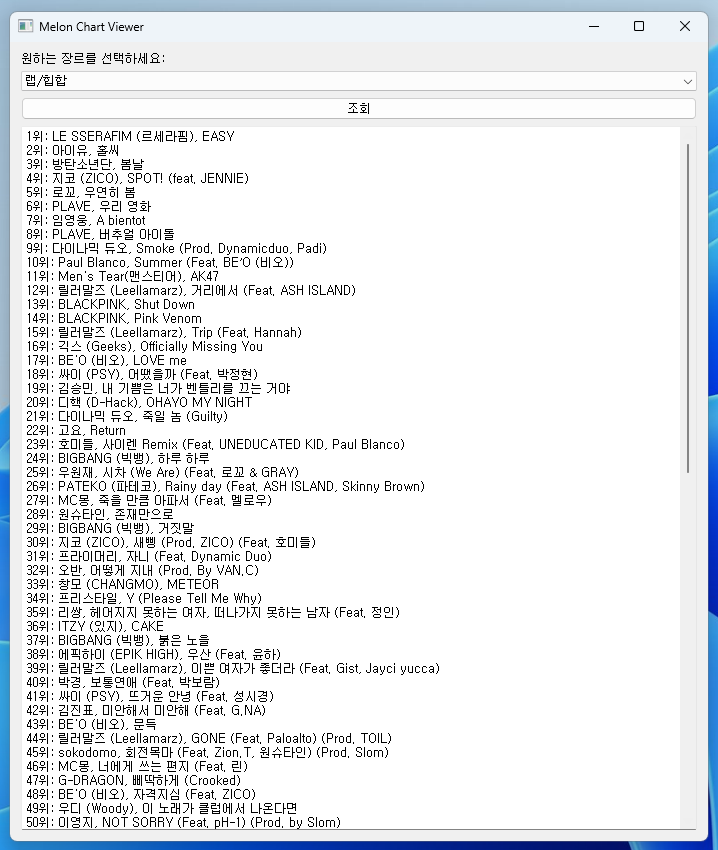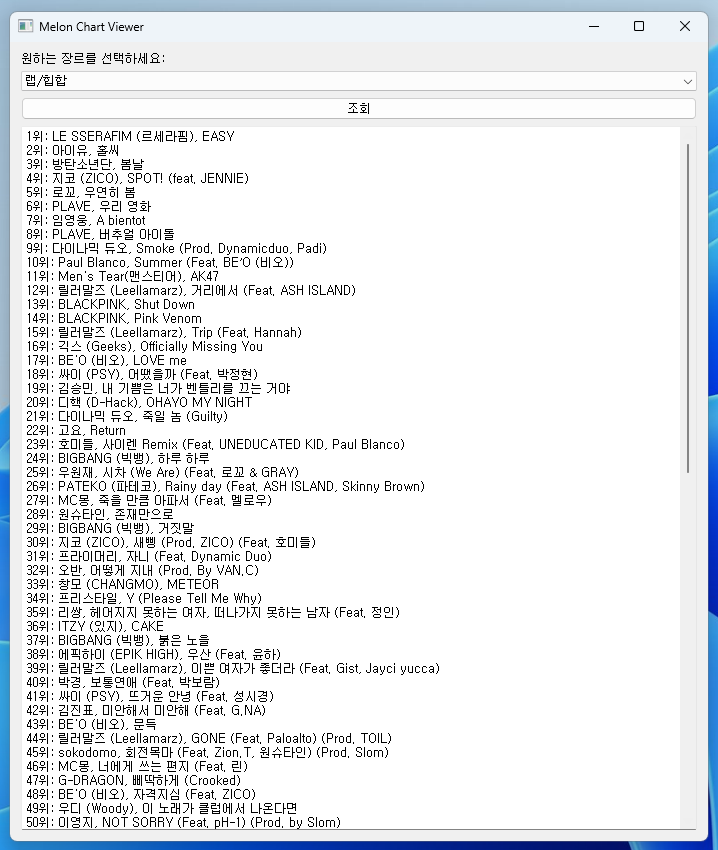